In [1]:
import numpy as np
from math import ceil
import matplotlib as mpl
import matplotlib.pyplot as plt

import rebound

In [2]:
# Unit conversions.
kg_to_Msun = 5.02785431e-31

# 67P/C-G mass in Msun (unit mass).
mass_67p_kg   = 9.982e+12
mass_67p_Msun = mass_67p_kg * kg_to_Msun

print(mass_67p_Msun)

# Time unit is year/(2 * pi).
t_final_yr = 70.0
t_final = t_final_yr * (2 * np.pi)

print(t_final)

5.018804172242e-18
439.822971502571


**Problem 2(a)**: Set up and run the 67P/C-G example problem. Only include the Sun, Saturn, and Jupiter for now.
Include a plot of the 67P/C-G comet and two planet orbits evolved over70 years.

In [3]:
# Initialize the simulation and sun/planets.
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

# Add the comet 67P/Churyumov-Gerasimenko.
sim.add("Churyumov-Gerasimenko", m=mass_67p_Msun)

# Move to center of momentum frame.
sim.move_to_com()

# Store copy of initial state.
sim_copy = sim.copy()

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


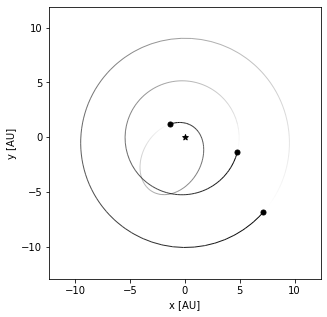

In [4]:
# Plot instantaneous orbits.
fig = rebound.OrbitPlot(sim, unitlabel="[AU]")

In [5]:
# Following example, integrate backwards in time for 70 years using IAS15 integrator.

# To integrate backwards, either set sim.dt = -0.01 or reverse all velocities.
sim.dt = -0.01

# Store positions of Jupiter, Saturn, comet.
N_outputs = 10000

times = np.linspace(0.0, -t_final, N_outputs)
x     = np.zeros((3, N_outputs))
y     = np.zeros((3, N_outputs))
z     = np.zeros((3, N_outputs))

# Array of pointers to particle data.
ps = sim.particles

# Integrate up to given time; store positions.
for i, time in enumerate(times):
    sim.integrate(time)
    
    # Jupiter data.
    x[0][i] = ps[1].x; y[0][i] = ps[1].y; z[0][i] = ps[1].z
    
    # Saturn data.
    x[1][i] = ps[2].x; y[1][i] = ps[2].y; z[1][i] = ps[2].z
    
    # Comet data.
    x[2][i] = ps[3].x; y[2][i] = ps[3].y; z[2][i] = ps[3].z

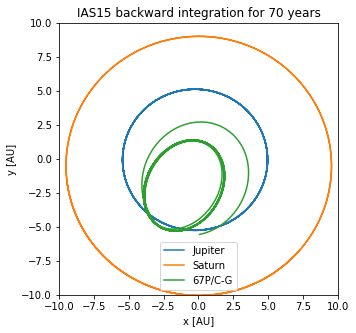

In [6]:
# Plot orbits.
fig = plt.figure(figsize=(5, 5))
ax  = plt.subplot(111)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.plot(x[0], y[0], label='Jupiter')
plt.plot(x[1], y[1], label='Saturn')
plt.plot(x[2], y[2], label='67P/C-G')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('IAS15 backward integration for 70 years')
plt.legend()
plt.show()

Minimum distance (0.048452 AU) occured at time: -63.055306 years.


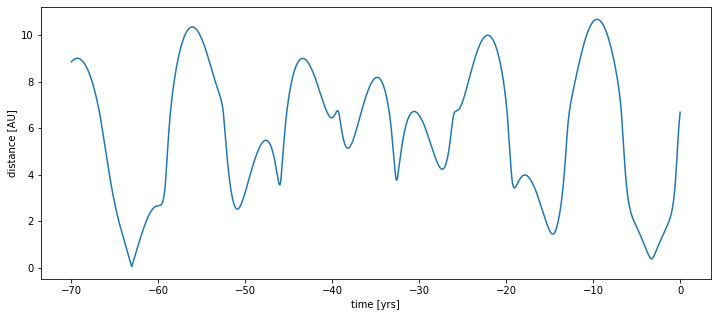

In [7]:
# Plot distance between Jupiter and 67P/C-G as a function of time.
fig = plt.figure(figsize=(12,5))
ax  = plt.subplot(111)

distance = np.sqrt(np.square(x[0]-x[2]) + np.square(y[0]-y[2]) + np.square(z[0]-z[2]))
plt.plot(times / (2.0 * np.pi), distance)

ax.set_xlabel("time [yrs]")
ax.set_ylabel("distance [AU]")

close_encounter_time = times[np.argmin(distance)] / (2.0 * np.pi)
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance), close_encounter_time))

In [8]:
# Actual encounter date.
encounter_date = datetime.datetime.today() + datetime.timedelta(days=365.25*close_encounter_time)
encounter_date.strftime("%Y-%m-%d %H:%M")

NameError: name 'datetime' is not defined

In [9]:
# Now integrate forwards in time for 70 years using IAS15 integrator.
sim_f = sim_copy.copy()

sim_f.dt = 0.01

# Store positions of Jupiter, Saturn, comet.
times_f = np.linspace(0.0, t_final, N_outputs)
x_f     = np.zeros((3, N_outputs))
y_f     = np.zeros((3, N_outputs))
z_f     = np.zeros((3, N_outputs))

# Array of pointers to particle data.
ps_f = sim_f.particles

# Integrate up to given time; store positions.
for i, time in enumerate(times_f):
    sim_f.integrate(time)
    
    # Jupiter data.
    x_f[0][i] = ps_f[1].x; y_f[0][i] = ps_f[1].y; z_f[0][i] = ps_f[1].z
    
    # Saturn data.
    x_f[1][i] = ps_f[2].x; y_f[1][i] = ps_f[2].y; z_f[1][i] = ps_f[2].z
    
    # Comet data.
    x_f[2][i] = ps_f[3].x; y_f[2][i] = ps_f[3].y; z_f[2][i] = ps_f[3].z

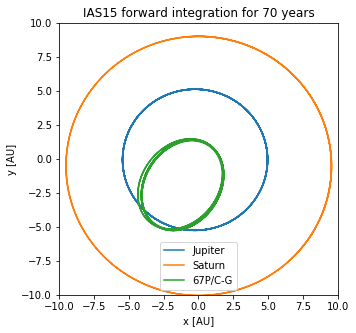

In [10]:
# Plot orbits.
fig = plt.figure(figsize=(5, 5))
ax  = plt.subplot(111)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.plot(x_f[0], y_f[0], label='Jupiter')
plt.plot(x_f[1], y_f[1], label='Saturn')
plt.plot(x_f[2], y_f[2], label='67P/C-G')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('IAS15 forward integration for 70 years')
plt.legend()
plt.savefig('/home/nina/Downloads/hw3_2a.png')
#plt.show()

**Problem 2(b)**: Experiment with the timestep and integrator choice. How does the result change with different
integrators? What integrator(s) do you you think work best for this problem? How does the result change as a 
function of the timestep? You can evaluate this by, e.g., looking at energy conservation as well as the change in
orbits. (*Note:* IAS15 has adaptive timestepping, so you need to set the minimum timestep.)

In [11]:
# Relative error.
def re(a, x):
    return np.abs((a - x) / a)

def mag(x):
    return np.sqrt(np.sum(x**2))
   
def plot_orbits(x_id, y_id, x_i, y_i, x_w, y_w, dt):
    
    fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(10.0, 10.0))

    axs[0][0].scatter(x_i[0], y_i[0], s=2, label='Jupiter')
    axs[0][0].scatter(x_i[1], y_i[1], s=2, label='Saturn')
    axs[0][0].scatter(x_i[2], y_i[2], s=2, label='67P/C-G')
    
    axs[0][1].scatter(x_id[0], y_id[0], s=2, label='Jupiter')
    axs[0][1].scatter(x_id[1], y_id[1], s=2, label='Saturn')
    axs[0][1].scatter(x_id[2], y_id[2], s=2, label='67P/C-G')
    
    axs[1][0].scatter(x_i[0], y_i[0], s=2, label='Jupiter')
    axs[1][0].scatter(x_i[1], y_i[1], s=2, label='Saturn')
    axs[1][0].scatter(x_i[2], y_i[2], s=2, label='67P/C-G')
    
    axs[0][0].set_title('IAS15 integration for 70 years (dt = {0:.5f} years)'.format(dt / (2.0 * np.pi)))
    axs[0][1].set_title('IAS15 integration for 70 years (default settings)')
    axs[1][0].set_title('WHFast integration for 70 years (dt = {0:.5f} years)'.format(dt / (2.0 * np.pi)))
    
    for ax in axs.reshape(-1):
        ax.set_xlim([-10, 10]); ax.set_ylim([-10, 10])
        ax.set_xlabel('x [AU]'); ax.set_ylabel('y [AU]')
        
    axs[0][0].legend(); axs[0][1].legend(); axs[1][0].legend()
    axs[1][1].axis("off")
        
    plt.show()
    
def print_statements(sim, orbits_i, da_id, de_id, dp_id, da_i, de_i, dp_i, da_w, de_w, dp_w, dt,
                     diff_pos_i, diff_pos_w, diff_vel_i, diff_vel_w, orbits=False):
    
    names = ('Sun    ', 'Jupiter', 'Saturn ', '67P/C-G')
    
    print('Integrated up to t = {0:.5f} years.\n'.format(sim.t / (2.0 * np.pi)))
    
    if (orbits):
        print('Initial orbital elements')
        print('JUPITER\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}'.format(orbits_i[0].a, orbits_i[0].e, 
                                                                  orbits_i[0].P))
        print('SATURN\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}'.format(orbits_i[1].a, orbits_i[1].e, 
                                                                 orbits_i[1].P))
        print('67P/C-G\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}\n'.format(orbits_i[2].a, orbits_i[2].e, 
                                                                    orbits_i[2].P))
    
        print('Change in orbital elements (default IAS15 integrator setting)')
        print('JUPITER\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}'.format(da_id[0], de_id[0], dp_id[0]))
        print('SATURN\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}'.format(da_id[1], de_id[1], dp_id[1]))
        print('67P/C-G\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}\n'.format(da_id[2], de_id[2], dp_id[2]))
    
        print('Change in orbital elements (IAS15; fixed dt = {0:.3f} years)'.format(dt / (2.0 * np.pi)))
        print('JUPITER\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}'.format(da_i[0], de_i[0], dp_i[0]))
        print('SATURN\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}'.format(da_i[1], de_i[1], dp_i[1]))
        print('67P/C-G\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}\n'.format(da_i[2], de_i[2], dp_i[2]))
    
        print('Change in orbital elements (WHFast; fixed dt = {0:.3f} years)'.format(dt / (2.0 * np.pi)))
        print('JUPITER\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}'.format(da_w[0], de_w[0], dp_w[0]))
        print('SATURN\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}'.format(da_w[1], de_w[1], dp_w[1]))
        print('67P/C-G\ta: {0:.8e}\te: {1:.8e}\tP:{2:.8e}\n'.format(da_w[2], de_w[2], dp_w[2]))
    
    print('IAS15 comparison: difference in final position/velocity.')
    for i in range(4):
        if i == 0:
            print('{0:s}:\t{1:.3e} (position)\t{2:.3e} (velocity)'.format(names[i], diff_pos_i[0][i],
                                                                          diff_vel_i[0][i]))
        else:
            print('{0:s}:\t{1:.3e}           \t{2:.3e}           '.format(names[i], diff_pos_i[0][i],
                                                                          diff_vel_i[0][i]))
            
        
    print('\nWHFast vs default IAS15 comparison: difference in final position/velocity.')
    for i in range(4):
        if i == 0:
            print('{0:s}:\t{1:.3e} (position)\t{2:.3e} (velocity)'.format(names[i], diff_pos_w[0][i],
                                                                          diff_vel_w[0][i]))
        else:
            print('{0:s}:\t{1:.3e}           \t{2:.3e}           '.format(names[i], diff_pos_w[0][i],
                                                                          diff_vel_w[0][i]))
                                                                                   
    return
    
def change_in_orbital_elements(orbits_i, orbits_f):
    
    da = np.zeros(3); de = np.zeros(3); dp = np.zeros(3); i = 0
    
    for o_i, o_f in zip(orbits_i, orbits_f):
        
        da[i] = re(o_i.a, o_f.a)
        de[i] = re(o_i.e, o_f.e)
        dp[i] = re(o_i.P, o_f.P)
        
        i += 1
        
    return da, de, dp

def difference_xv_magnitude(sim_id, sim_i, sim_w):
    
    # Compare final positions, velocities of particles with default IAS15 integrator.
    diff_i = sim_id - sim_i; diff_w = sim_id - sim_w
    ps_diff_i = diff_i.particles; ps_diff_w = diff_w.particles
    
    p_i_sun = ps_diff_i[0]; p_i_jup = ps_diff_i[1]  # Sun, Jupiter (IAS15 fixed dt vs. default)
    p_i_sat = ps_diff_i[2]; p_i_67p = ps_diff_i[3]  # Saturn, 67P/C-G
    
    p_w_sun = ps_diff_w[0]; p_w_jup = ps_diff_w[1]  # Sun, Jupiter (IAS15 fixed dt vs. default)
    p_w_sat = ps_diff_w[2]; p_w_67p = ps_diff_w[3]  # Saturn, 67P/C-G
    
    x_i_sun = p_i_sun.x; y_i_sun = p_i_sun.y; z_i_sun = p_i_sun.z
    x_i_jup = p_i_jup.x; y_i_jup = p_i_jup.y; z_i_jup = p_i_jup.z
    x_i_sat = p_i_sat.x; y_i_sat = p_i_sat.y; z_i_sat = p_i_sat.z
    x_i_67p = p_i_67p.x; y_i_67p = p_i_67p.y; z_i_67p = p_i_67p.z
    
    x_w_sun = p_w_sun.x; y_w_sun = p_w_sun.y; z_w_sun = p_w_sun.z
    x_w_jup = p_w_jup.x; y_w_jup = p_w_jup.y; z_w_jup = p_w_jup.z
    x_w_sat = p_w_sat.x; y_w_sat = p_w_sat.y; z_w_sat = p_w_sat.z
    x_w_67p = p_w_67p.x; y_w_67p = p_w_67p.y; z_w_67p = p_w_67p.z
    
    vx_i_sun = p_i_sun.vx; vy_i_sun = p_i_sun.vy; vz_i_sun = p_i_sun.vz
    vx_i_jup = p_i_jup.vx; vy_i_jup = p_i_jup.vy; vz_i_jup = p_i_jup.vz
    vx_i_sat = p_i_sat.vx; vy_i_sat = p_i_sat.vy; vz_i_sat = p_i_sat.vz
    vx_i_67p = p_i_67p.vx; vy_i_67p = p_i_67p.vy; vz_i_67p = p_i_67p.vz
    
    vx_w_sun = p_w_sun.vx; vy_w_sun = p_w_sun.vy; vz_w_sun = p_w_sun.vz
    vx_w_jup = p_w_jup.vx; vy_w_jup = p_w_jup.vy; vz_w_jup = p_w_jup.vz
    vx_w_sat = p_w_sat.vx; vy_w_sat = p_w_sat.vy; vz_w_sat = p_w_sat.vz
    vx_w_67p = p_w_67p.vx; vy_w_67p = p_w_67p.vy; vz_w_67p = p_w_67p.vz
    
    pos_i_sun = mag(np.asarray([x_i_sun, y_i_sun, z_i_sun]))
    pos_i_jup = mag(np.asarray([x_i_jup, y_i_jup, z_i_jup]))
    pos_i_sat = mag(np.asarray([x_i_sat, y_i_sat, z_i_sat]))
    pos_i_67p = mag(np.asarray([x_i_67p, y_i_67p, z_i_67p]))
    
    vel_i_sun = mag(np.asarray([vx_i_sun, vy_i_sun, vz_i_sun]))
    vel_i_jup = mag(np.asarray([vx_i_jup, vy_i_jup, vz_i_jup]))
    vel_i_sat = mag(np.asarray([vx_i_sat, vy_i_sat, vz_i_sat]))
    vel_i_67p = mag(np.asarray([vx_i_67p, vy_i_67p, vz_i_67p]))
    
    pos_w_sun = mag(np.asarray([x_w_sun, y_w_sun, z_i_sun]))
    pos_w_jup = mag(np.asarray([x_w_jup, y_w_jup, z_i_jup]))
    pos_w_sat = mag(np.asarray([x_w_sat, y_w_sat, z_i_sat]))
    pos_w_67p = mag(np.asarray([x_w_67p, y_w_67p, z_i_67p]))
    
    vel_w_sun = mag(np.asarray([vx_w_sun, vy_w_sun, vz_w_sun]))
    vel_w_jup = mag(np.asarray([vx_w_jup, vy_w_jup, vz_w_jup]))
    vel_w_sat = mag(np.asarray([vx_w_sat, vy_w_sat, vz_w_sat]))
    vel_w_67p = mag(np.asarray([vx_w_67p, vy_w_67p, vz_w_67p]))
    
    diff_pos_i = np.reshape(np.asarray([pos_i_sun, pos_i_jup, pos_i_sat, pos_i_67p]), (1, 4))
    diff_vel_i = np.reshape(np.asarray([vel_i_sun, vel_i_jup, vel_i_sat, vel_i_67p]), (1, 4))
    diff_pos_w = np.reshape(np.asarray([pos_w_sun, pos_w_jup, pos_w_sat, pos_w_67p]), (1, 4))
    diff_vel_w = np.reshape(np.asarray([vel_w_sun, vel_w_jup, vel_w_sat, vel_w_67p]), (1, 4))
    
    return diff_pos_i, diff_pos_w, diff_vel_i, diff_vel_w


def integrate(sim, t_final, dt, N_outputs, integrator, defaults=False):
    
    if integrator == "ias15":
        sim.integrator = "ias15"
        if not defaults:
            sim.ri_ias15.epsilon = 0
            sim.dt = dt
            sim.min_dt = dt
    elif integrator == "whfast":
        sim.integrator = "whfast"
        sim.dt = dt
    
    # Store positions of Jupiter, Saturn, comet.
    times = np.linspace(0.0, t_final, N_outputs)
    x     = np.zeros((3, N_outputs))
    y     = np.zeros((3, N_outputs))
    z     = np.zeros((3, N_outputs))
    
    # Array of pointers to particle data.
    ps = sim.particles
    
    # Integrate up to given time; store positions.
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=1)
    
        x[0][i] = ps[1].x; y[0][i] = ps[1].y; z[0][i] = ps[1].z  # Jupiter data.
        x[1][i] = ps[2].x; y[1][i] = ps[2].y; z[1][i] = ps[2].z  # Saturn data.
        x[2][i] = ps[3].x; y[2][i] = ps[3].y; z[2][i] = ps[3].z  # Comet data.
        
    return times, x, y, z

def integration_test(sim, t_final, dt, N_outputs, verbose=False, output=False):
    
    # Round up t_final to nearest timestep multiple.
    t_last = dt * N_outputs
    
    sim_id = sim.copy()  # Default IAS15 integrator settings.
    sim_i  = sim.copy()  # Integrate with IAS15 with fixed dt.
    sim_w  = sim.copy()  # Integrate with WHFast with fixed dt.
    
    orbits_i = sim.calculate_orbits()
    
    t_id, x_id, y_id, z_id = integrate(sim_id, t_last, dt, N_outputs, "ias15", defaults=True)
    t_i, x_i, y_i, z_i     = integrate(sim_i, t_last, dt, N_outputs, "ias15", defaults=False)
    t_w, x_w, y_w, z_w     = integrate(sim_w, t_last, dt, N_outputs, "whfast", defaults=False)
    
    orbits_f_id = sim_id.calculate_orbits()
    orbits_f_i  = sim_i.calculate_orbits()
    orbits_f_w  = sim_w.calculate_orbits()
    
    da_id, de_id, dp_id = change_in_orbital_elements(orbits_i, orbits_f_id)
    da_i, de_i, dp_i    = change_in_orbital_elements(orbits_i, orbits_f_i)
    da_w, de_w, dp_w    = change_in_orbital_elements(orbits_i, orbits_f_i)
    
    diff_pos_i, diff_pos_w, diff_vel_i, diff_vel_w = difference_xv_magnitude(sim_id, sim_i, sim_w)
    
    plot_orbits(x_id, y_id, x_i, y_i, x_w, y_w, dt)
    
    if verbose:
        print_statements(sim_i, orbits_i, da_id, de_id, dp_id, da_i, de_i, dp_i, da_w, de_w, dp_w, dt,
                         diff_pos_i, diff_pos_w, diff_vel_i, diff_vel_w)
        
    if output:
        return sim_id, sim_i, sim_w 

/home/nina/miniconda3/lib/python3.6/site-packages/rebound/simulation.py:712: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


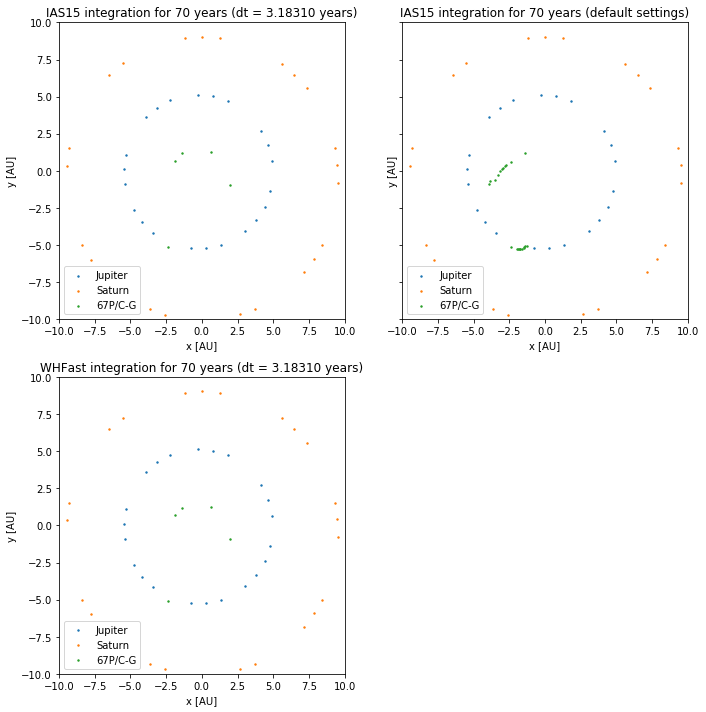

Integrated up to t = 70.02817 years.

IAS15 comparison: difference in final position/velocity.
Sun    :	4.113e-09 (position)	3.683e-10 (velocity)
Jupiter:	4.434e-06           	3.906e-07           
Saturn :	5.236e-07           	1.796e-08           
67P/C-G:	4.639e+02           	1.571e+00           

WHFast vs default IAS15 comparison: difference in final position/velocity.
Sun    :	4.139e-05 (position)	2.629e-06 (velocity)
Jupiter:	2.352e-02           	2.116e-03           
Saturn :	7.085e-02           	2.416e-03           
67P/C-G:	9.494e+00           	1.282e+00           


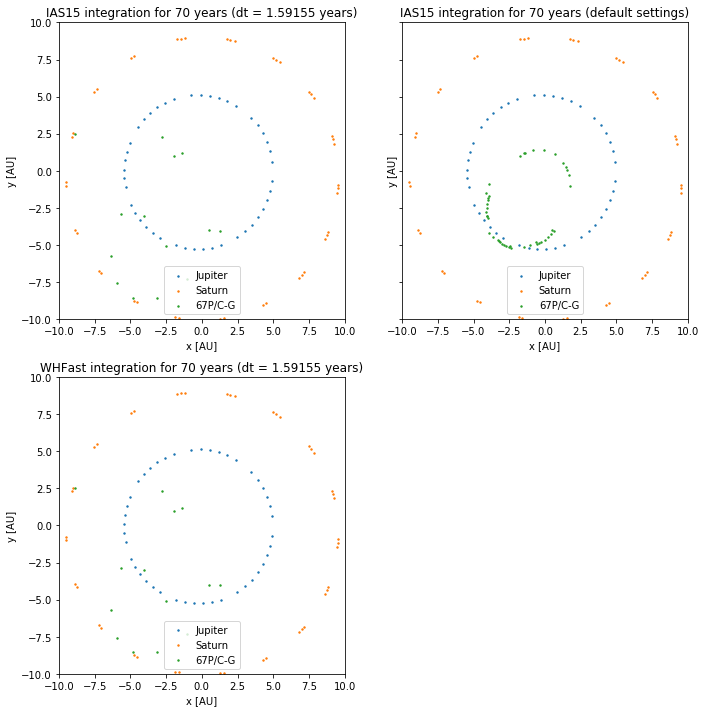

Integrated up to t = 70.02817 years.

IAS15 comparison: difference in final position/velocity.
Sun    :	3.605e-14 (position)	2.575e-15 (velocity)
Jupiter:	2.854e-11           	2.336e-12           
Saturn :	3.407e-11           	1.352e-12           
67P/C-G:	9.363e+01           	5.423e-01           

WHFast vs default IAS15 comparison: difference in final position/velocity.
Sun    :	2.630e-07 (position)	2.409e-08 (velocity)
Jupiter:	2.785e-04           	2.731e-05           
Saturn :	3.620e-04           	1.079e-05           
67P/C-G:	4.406e+00           	3.724e-01           


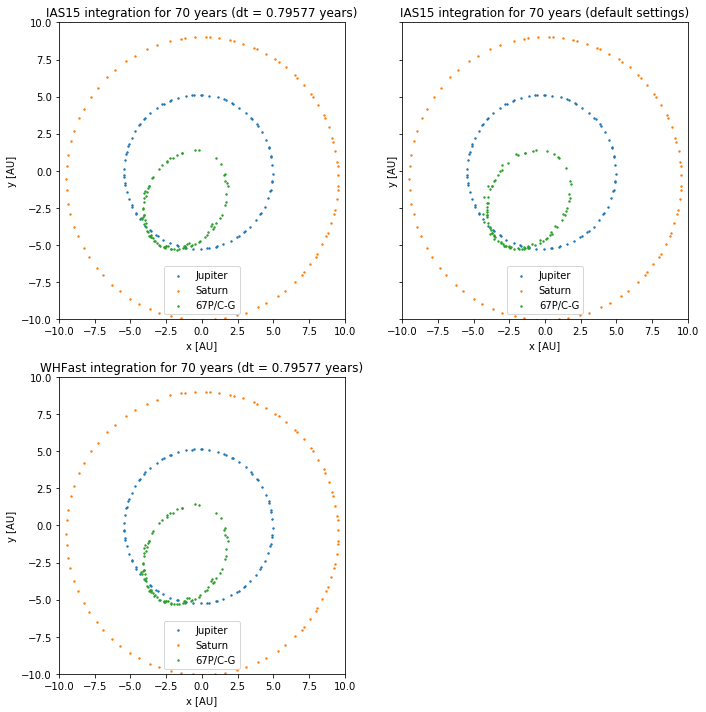

Integrated up to t = 70.02817 years.

IAS15 comparison: difference in final position/velocity.
Sun    :	1.123e-16 (position)	9.785e-18 (velocity)
Jupiter:	1.351e-13           	1.174e-14           
Saturn :	1.436e-13           	5.268e-15           
67P/C-G:	2.473e-01           	3.193e-02           

WHFast vs default IAS15 comparison: difference in final position/velocity.
Sun    :	3.633e-07 (position)	2.720e-08 (velocity)
Jupiter:	2.969e-04           	2.506e-05           
Saturn :	3.097e-04           	1.299e-05           
67P/C-G:	2.619e-01           	1.212e-01           


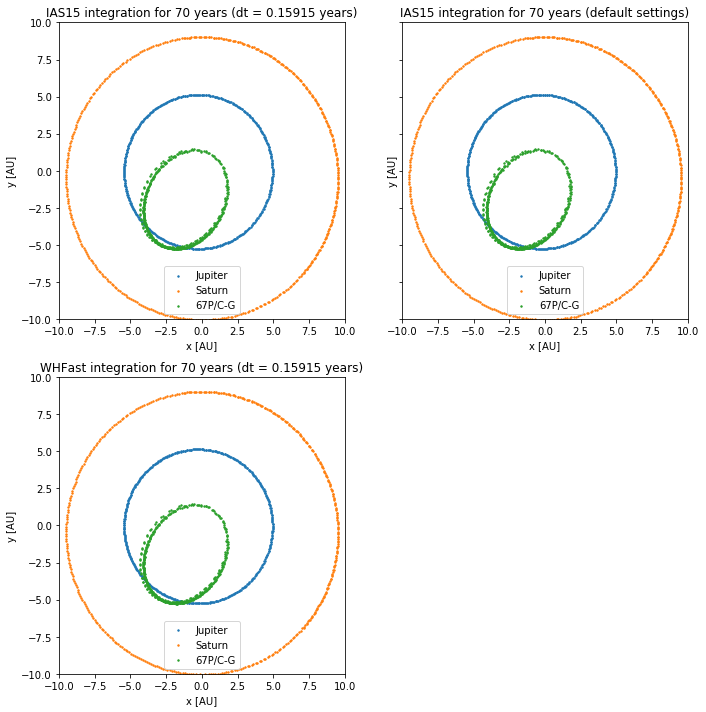

Integrated up to t = 70.02817 years.

IAS15 comparison: difference in final position/velocity.
Sun    :	3.790e-16 (position)	3.961e-17 (velocity)
Jupiter:	5.280e-13           	4.545e-14           
Saturn :	4.322e-13           	1.554e-14           
67P/C-G:	2.413e-10           	2.285e-11           

WHFast vs default IAS15 comparison: difference in final position/velocity.
Sun    :	1.300e-08 (position)	9.798e-10 (velocity)
Jupiter:	1.075e-05           	9.058e-07           
Saturn :	1.061e-05           	4.544e-07           
67P/C-G:	2.799e-02           	3.318e-03           


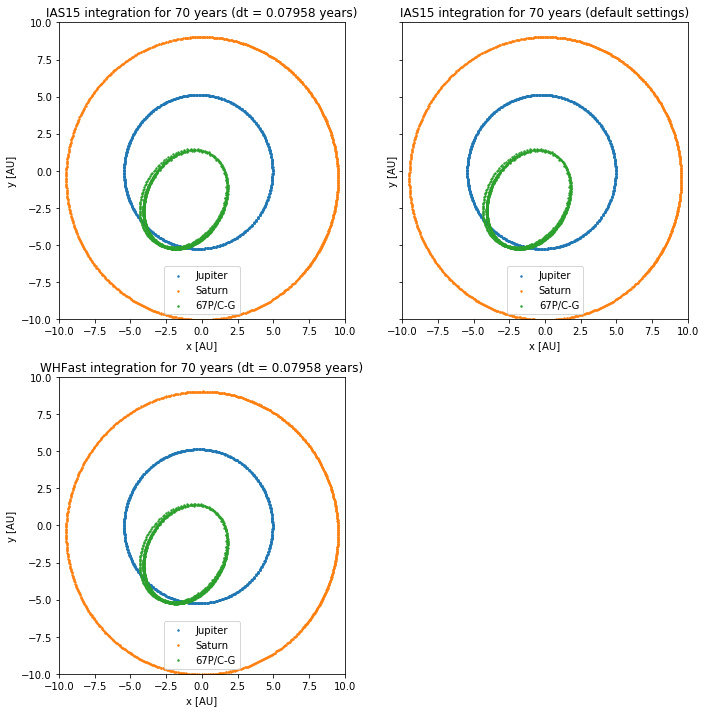

Integrated up to t = 70.02817 years.

IAS15 comparison: difference in final position/velocity.
Sun    :	4.054e-17 (position)	5.740e-18 (velocity)
Jupiter:	8.019e-14           	6.862e-15           
Saturn :	8.954e-14           	3.237e-15           
67P/C-G:	6.951e-14           	8.618e-15           

WHFast vs default IAS15 comparison: difference in final position/velocity.
Sun    :	3.239e-09 (position)	2.443e-10 (velocity)
Jupiter:	2.682e-06           	2.259e-07           
Saturn :	2.641e-06           	1.132e-07           
67P/C-G:	7.579e-04           	1.005e-04           


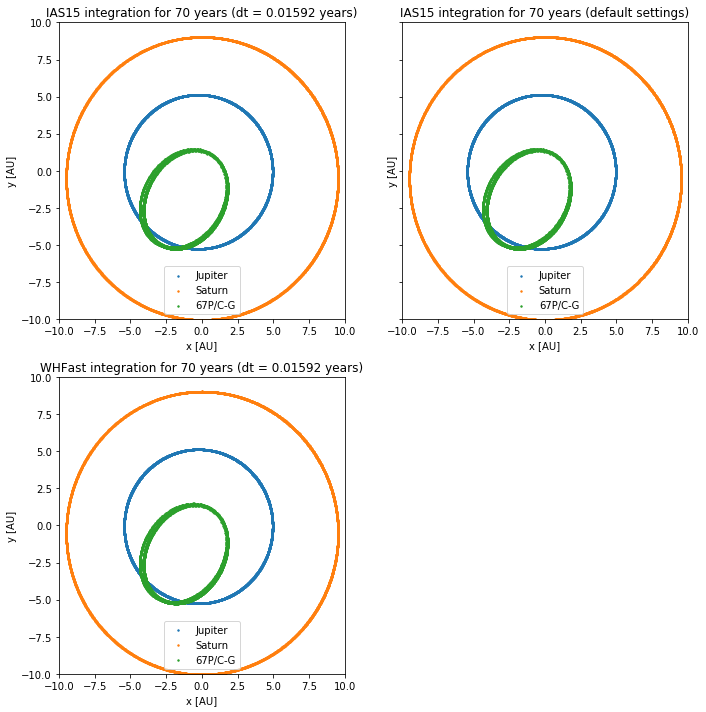

Integrated up to t = 70.01226 years.

IAS15 comparison: difference in final position/velocity.
Sun    :	1.979e-15 (position)	1.922e-16 (velocity)
Jupiter:	2.551e-12           	2.194e-13           
Saturn :	1.961e-12           	7.058e-14           
67P/C-G:	1.760e-12           	1.992e-13           

WHFast vs default IAS15 comparison: difference in final position/velocity.
Sun    :	1.296e-10 (position)	9.766e-12 (velocity)
Jupiter:	1.072e-07           	9.027e-09           
Saturn :	1.055e-07           	4.522e-09           
67P/C-G:	3.081e-05           	4.009e-06           


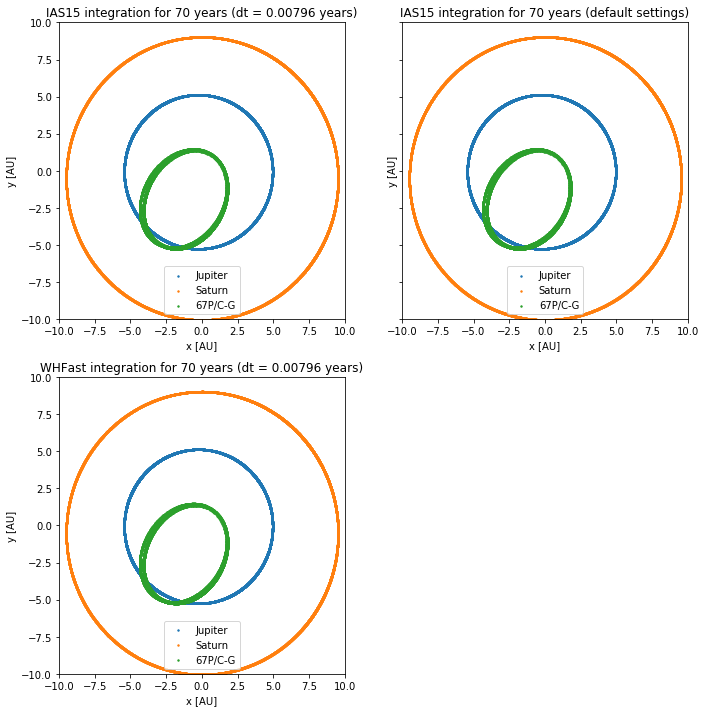

Integrated up to t = 70.00430 years.

IAS15 comparison: difference in final position/velocity.
Sun    :	3.958e-15 (position)	3.842e-16 (velocity)
Jupiter:	5.100e-12           	4.386e-13           
Saturn :	3.895e-12           	1.402e-13           
67P/C-G:	3.472e-12           	3.933e-13           

WHFast vs default IAS15 comparison: difference in final position/velocity.
Sun    :	3.235e-11 (position)	2.436e-12 (velocity)
Jupiter:	2.674e-08           	2.251e-09           
Saturn :	2.642e-08           	1.132e-09           
67P/C-G:	7.681e-06           	9.998e-07           


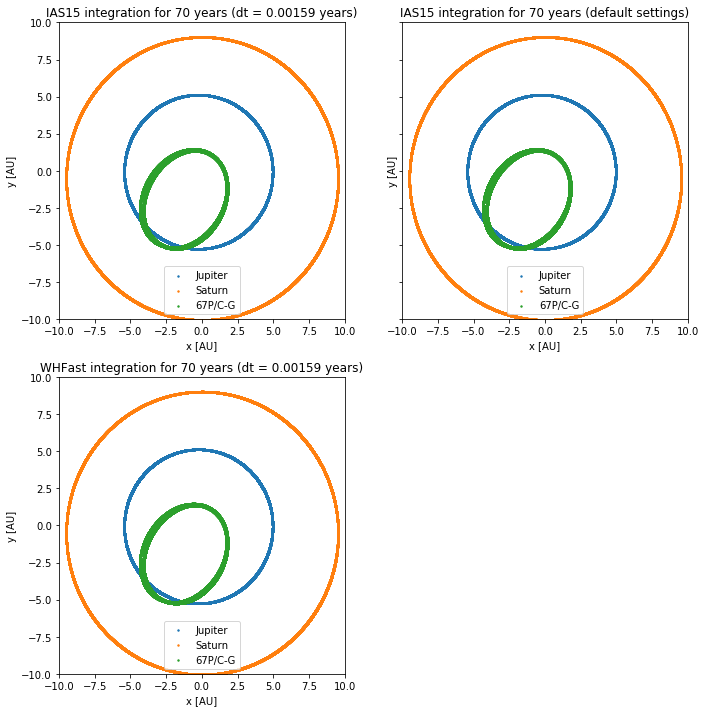

Integrated up to t = 70.00112 years.

IAS15 comparison: difference in final position/velocity.
Sun    :	1.780e-13 (position)	1.726e-14 (velocity)
Jupiter:	2.291e-10           	1.971e-11           
Saturn :	1.754e-10           	6.310e-12           
67P/C-G:	1.555e-10           	1.763e-11           

WHFast vs default IAS15 comparison: difference in final position/velocity.
Sun    :	9.334e-13 (position)	5.683e-14 (velocity)
Jupiter:	5.270e-10           	4.331e-11           
Saturn :	1.477e-09           	6.046e-11           
67P/C-G:	3.072e-07           	3.999e-08           


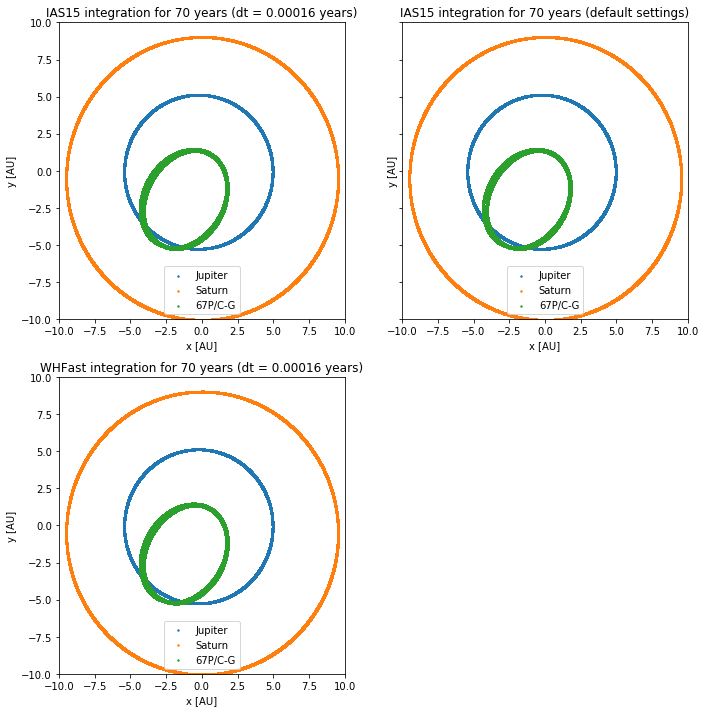

Integrated up to t = 70.00000 years.

IAS15 comparison: difference in final position/velocity.
Sun    :	8.942e-19 (position)	7.667e-20 (velocity)
Jupiter:	1.256e-15           	7.852e-17           
Saturn :	0.000e+00           	0.000e+00           
67P/C-G:	2.599e-15           	2.724e-16           

WHFast vs default IAS15 comparison: difference in final position/velocity.
Sun    :	6.877e-13 (position)	1.295e-14 (velocity)
Jupiter:	1.584e-10           	1.365e-11           
Saturn :	2.114e-10           	7.638e-12           
67P/C-G:	3.187e-09           	4.129e-10           


In [12]:
dt_vals = [20.0, 10.0, 5.0, 1.0, 0.5, 0.1, 0.05, 0.01, 0.001]
s = sim_copy.copy()

sims_id = []; sims_i = []; sims_w = []

for dt in dt_vals:
    N_outputs = ceil(t_final / dt)
    s_id, s_i, s_w = integration_test(s, t_final, dt, N_outputs, verbose=True, output=True)
    sims_id.append(s_id); sims_i.append(s_i); sims_w.append(s_w)

In [13]:
pos_i = np.zeros(len(dt_vals)); vel_i = np.zeros(len(dt_vals))
pos_w = np.zeros(len(dt_vals)); vel_w = np.zeros(len(dt_vals))

body = '67p'

for i in range(len(dt_vals)):
    diff_pos_i, diff_pos_w, diff_vel_i, diff_vel_w = difference_xv_magnitude(sims_id[i], sims_i[i], sims_w[i])
    
    if body == 'sun':
        pos_i[i] = diff_pos_i[0][0]; vel_i[i] = diff_vel_i[0][0]
        pos_w[i] = diff_pos_w[0][0]; vel_w[i] = diff_vel_w[0][0]
        
    elif body == 'jup':
        pos_i[i] = diff_pos_i[0][1]; vel_i[i] = diff_vel_i[0][1]
        pos_w[i] = diff_pos_w[0][1]; vel_w[i] = diff_vel_w[0][1]
        
    elif body == 'sat':
        pos_i[i] = diff_pos_i[0][2]; vel_i[i] = diff_vel_i[0][2]
        pos_w[i] = diff_pos_w[0][2]; vel_w[i] = diff_vel_w[0][2]
    
    elif body == '67p':
        pos_i[i] = diff_pos_i[0][3]; vel_i[i] = diff_vel_i[0][3]
        pos_w[i] = diff_pos_w[0][3]; vel_w[i] = diff_vel_w[0][3]

In [14]:
pos_i_sun = np.zeros(len(dt_vals)); vel_i_sun = np.zeros(len(dt_vals))
pos_w_sun = np.zeros(len(dt_vals)); vel_w_sun = np.zeros(len(dt_vals))

pos_i_jup = np.zeros(len(dt_vals)); vel_i_jup = np.zeros(len(dt_vals))
pos_w_jup = np.zeros(len(dt_vals)); vel_w_jup = np.zeros(len(dt_vals))

pos_i_sat = np.zeros(len(dt_vals)); vel_i_sat = np.zeros(len(dt_vals))
pos_w_sat = np.zeros(len(dt_vals)); vel_w_sat = np.zeros(len(dt_vals))

pos_i_67p = np.zeros(len(dt_vals)); vel_i_67p = np.zeros(len(dt_vals))
pos_w_67p = np.zeros(len(dt_vals)); vel_w_67p = np.zeros(len(dt_vals))

for i in range(len(dt_vals)):
    diff_pos_i, diff_pos_w, diff_vel_i, diff_vel_w = difference_xv_magnitude(sims_id[i], sims_i[i], sims_w[i])
    
    pos_i_sun[i] = diff_pos_i[0][0]; vel_i_sun[i] = diff_vel_i[0][0]
    pos_w_sun[i] = diff_pos_w[0][0]; vel_w_sun[i] = diff_vel_w[0][0]
        
    pos_i_jup[i] = diff_pos_i[0][1]; vel_i_jup[i] = diff_vel_i[0][1]
    pos_w_jup[i] = diff_pos_w[0][1]; vel_w_jup[i] = diff_vel_w[0][1]
        
    pos_i_sat[i] = diff_pos_i[0][2]; vel_i_sat[i] = diff_vel_i[0][2]
    pos_w_sat[i] = diff_pos_w[0][2]; vel_w_sat[i] = diff_vel_w[0][2]
    
    pos_i_67p[i] = diff_pos_i[0][3]; vel_i_67p[i] = diff_vel_i[0][3]
    pos_w_67p[i] = diff_pos_w[0][3]; vel_w_67p[i] = diff_vel_w[0][3]

In [16]:
def integrator_comparison_plots(fname, dt_vals_code, y1, y2, y3, y4, y5, y6, y7, y8,
                                coord, plot_line=False, y_line=0.0):
    label_sun = 'Sun'; label_jup = 'Jupiter'; label_sat = 'Saturn'; label_67p = '67P/C-G'
    
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(12.0, 6.0))
    
    dt_vals = np.asarray(dt_vals_code) / (2.0 * np.pi)
    
    axs[0].loglog(dt_vals, y1, '-o', label=label_sun, linewidth=3)
    axs[0].loglog(dt_vals, y2, '-o', label=label_jup, linewidth=3)
    axs[0].loglog(dt_vals, y3, '-o', label=label_sat, linewidth=3)
    axs[0].loglog(dt_vals, y4, '-o', label=label_67p, linewidth=3)
    
    axs[1].loglog(dt_vals, y5, '-o', label=label_sun, linewidth=3)
    axs[1].loglog(dt_vals, y6, '-o', label=label_jup, linewidth=3)
    axs[1].loglog(dt_vals, y7, '-o', label=label_sat, linewidth=3)
    axs[1].loglog(dt_vals, y8, '-o', label=label_67p, linewidth=3)
    
    axs[0].set_title('IAS15 (default vs. fixed timestep)')
    axs[1].set_title('WHFast vs. default')
    axs[0].set_xlabel('$\Delta t$ (years)')
    axs[1].set_xlabel('$\Delta t$ (years)')
    
    if coord == 'position':
        axs[0].set_ylabel('relative difference in final position')
    else:
        axs[0].set_ylabel('relative difference in final velocity')
        
    axs[0].grid(visible=True)
    axs[1].grid(visible=True)
    axs[0].legend(); axs[1].legend()

    if plot_line:
        axs[0].axhline(y=y_line, color='#d62728', linestyle='--')
        axs[1].axhline(y=y_line, color='#d62728', linestyle='--')

    #plt.show()
    plt.savefig(fname)

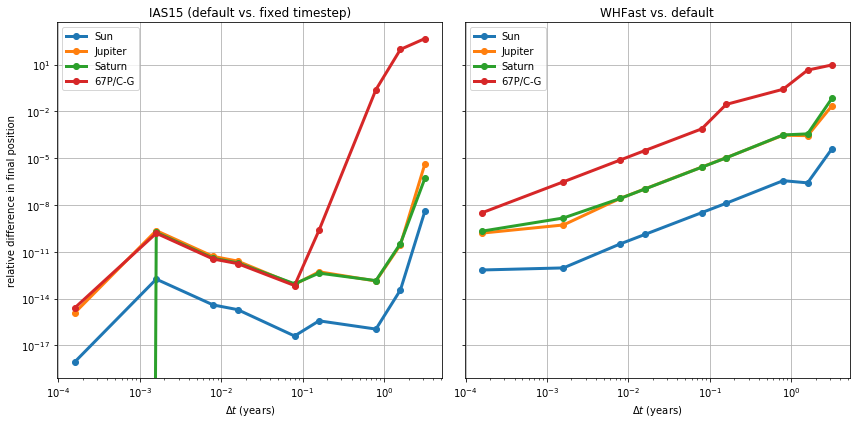

In [17]:
fname = '/home/nina/Downloads/hw3_2b1.png'

integrator_comparison_plots(fname, dt_vals, pos_i_sun, pos_i_jup, pos_i_sat, pos_i_67p,
                            pos_w_sun, pos_w_jup, pos_w_sat, pos_w_67p,
                            'position')

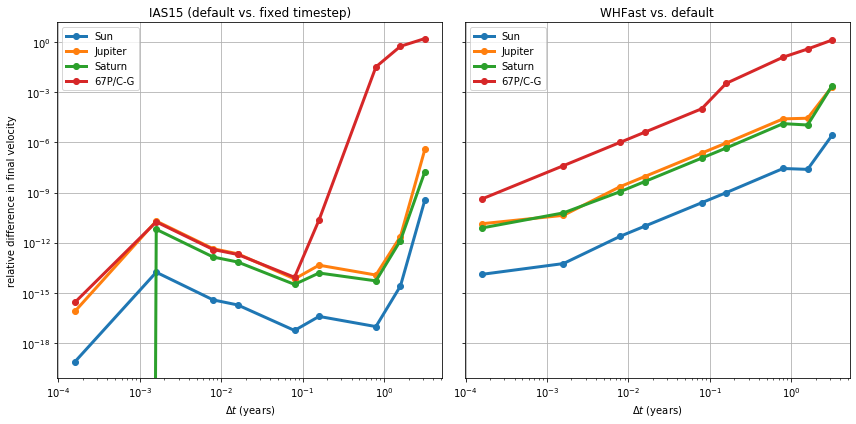

In [18]:
fname = '/home/nina/Downloads/hw3_2b2.png'

integrator_comparison_plots(fname, dt_vals, vel_i_sun, vel_i_jup, vel_i_sat, vel_i_67p,
                            vel_w_sun, vel_w_jup, vel_w_sat, vel_w_67p,
                            'velocity')

**Problem 2(c)**: How does the orbit of 67-P change when you add the rest of the missing bodies?

In [19]:
# Initialize the simulation and sun/planets.
sim_full = rebound.Simulation()
sim_full.add("Sun", hash="sun")
sim_full.add("Jupiter", hash="jup")
sim_full.add("Saturn", hash="sat")

# Add the comet 67P/Churyumov-Gerasimenko.
sim_full.add("Churyumov-Gerasimenko", m=mass_67p_Msun, hash="67p")

sim_full.add("Mercury", hash="mer")
sim_full.add("Venus", hash="ven")
sim_full.add("Mars", hash="mar")
sim_full.add("Earth", hash="ear")
sim_full.add("Neptune", hash="nep")
sim_full.add("Uranus", hash="ura")
#sim_full.add("Pluto") :(

# Move to center of momentum frame.
sim_full.move_to_com()

# Store copy of initial state.
sim_full_copy = sim_full.copy()

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')


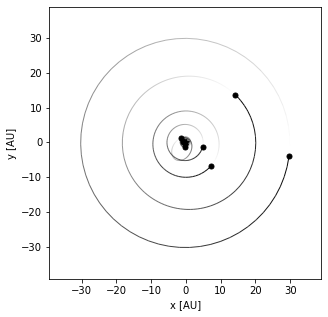

In [20]:
# Plot instantaneous orbits.
fig = rebound.OrbitPlot(sim_full, unitlabel="[AU]")

In [21]:
sim_full.dt = 0.01
N_outputs = 10000

times = np.linspace(0.0, t_final, N_outputs)
x     = np.zeros((3, N_outputs))
y     = np.zeros((3, N_outputs))
z     = np.zeros((3, N_outputs))

ps_full = sim_full.particles

# Integrate up to given time; store positions.
for i, time in enumerate(times):
    sim_full.integrate(time)
    
    # Jupiter data.
    x[0][i] = ps_full[1].x; y[0][i] = ps_full[1].y; z[0][i] = ps_full[1].z
    
    # Saturn data.
    x[1][i] = ps_full[2].x; y[1][i] = ps_full[2].y; z[1][i] = ps_full[2].z
    
    # Comet data.
    x[2][i] = ps_full[3].x; y[2][i] = ps_full[3].y; z[2][i] = ps_full[3].z

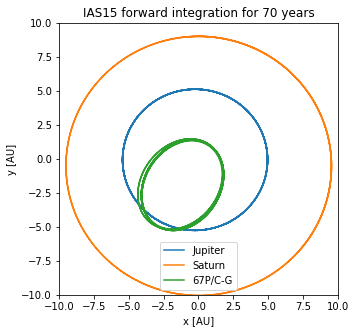

In [22]:
# Plot orbits.
fig = plt.figure(figsize=(5, 5))
ax  = plt.subplot(111)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.plot(x[0], y[0], label='Jupiter')
plt.plot(x[1], y[1], label='Saturn')
plt.plot(x[2], y[2], label='67P/C-G')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('IAS15 forward integration for 70 years')
plt.legend()
plt.show()

In [23]:
# Difference in final particle position/velocity with and without the other planets
sim1 = sim_f.copy()
sim2 = sim_full.copy()

# Remove the other planets.
sim2.remove(9); sim2.remove(8); sim2.remove(7); sim2.remove(6); sim2.remove(5); sim2.remove(4)


sim_12 = sim1 - sim2

In [24]:
ps_12 = sim_12.particles

x_12  = ps_12[3].x;   y_12 = ps_12[3].y;   z_12 = ps_12[3].z
vx_12 = ps_12[3].vx; vy_12 = ps_12[3].vy; vz_12 = ps_12[3].vz

pos_12 = np.asarray([x_12, y_12, z_12])
vel_12 = np.asarray([vx_12, vy_12, vz_12])

diff_pos = mag(pos_12)
diff_vel = mag(vel_12)

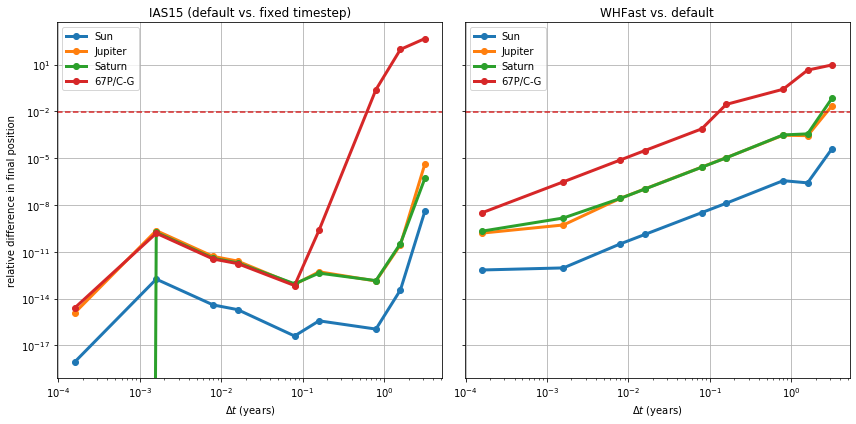

In [25]:
fname = '/home/nina/Downloads/hw3_2c1.png'

integrator_comparison_plots(fname, dt_vals, pos_i_sun, pos_i_jup, pos_i_sat, pos_i_67p,
                            pos_w_sun, pos_w_jup, pos_w_sat, pos_w_67p,
                            'position', plot_line=True, y_line=diff_pos)

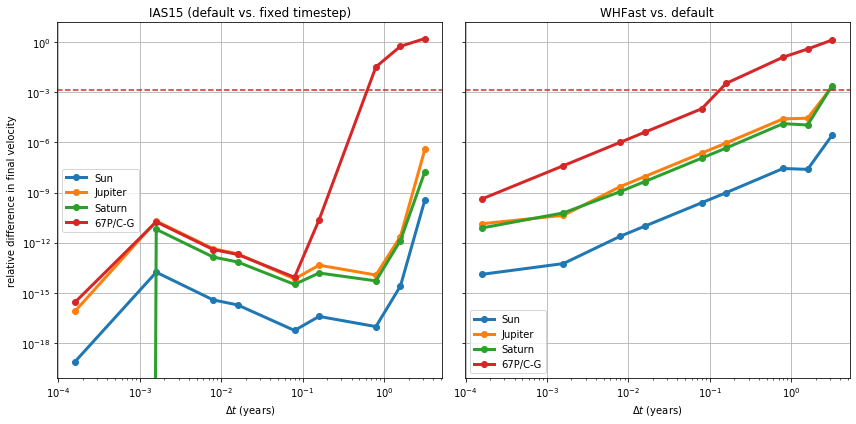

In [26]:
fname = '/home/nina/Downloads/hw3_2c2.png'

integrator_comparison_plots(fname, dt_vals, vel_i_sun, vel_i_jup, vel_i_sat, vel_i_67p,
                            vel_w_sun, vel_w_jup, vel_w_sat, vel_w_67p,
                            'velocity', plot_line=True, y_line=diff_vel)

**Problem 2(d)**: Compare the Rebound Sun/Earth orbit with your result from HW 1.

In [27]:
# Rebound simulation, one orbit.
sim_se = rebound.Simulation()

sim_se.add("Sun")
sim_se.add("Earth")

sim_se.move_to_com()
sim_se_copy = sim_se.copy()

sim_se.dt = 0.01

sim_se.integrate(2.0 * np.pi)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')


In [28]:
ps_old = sim_se_copy.particles
ps_new = sim_se.particles

r_old = np.asarray([ps_old[1].x, ps_old[1].y, ps_old[1].z])
r_new = np.asarray([ps_new[1].x, ps_new[1].y, ps_new[1].z])

print('relative error in radius: {0:.3e}'.format(mag(r_old - r_new)))

relative error in radius: 1.415e-04
